# Intro To OpenCV

In [256]:
#!pip install opencv-python


In [257]:
import cv2

cv2.__version__


'4.5.5'

#### Reading Image

In [258]:
img_path = 'images/Lenna.png'


img_bgr = cv2.imread(img_path)
img_np = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


print("Image Shape:",img_np.shape)


Image Shape: (512, 512, 3)


#### Showing Image

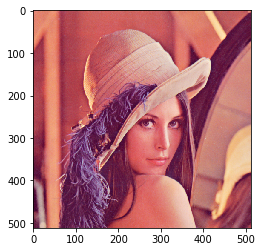

In [259]:
from matplotlib import pyplot as plt
plt.imshow(img_np)
plt.show()

#### Saving Image

In [260]:
cv2.imwrite("images/save_img.png",img_np)

True

[226 137 125]


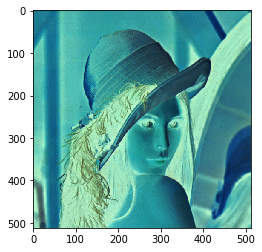

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


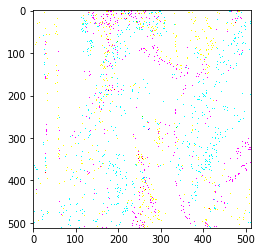

In [261]:
# crop image using numpy slice
plt.imshow(img_np[225:325, 50:350])
# access BRG pixels
print(img_np[0][0])
# inverse image
plt.imshow(255 - img_np)
plt.show()
# inverse image
plt.imshow((img_np%100.0))
plt.show()

#### Split image in R, G, B channel

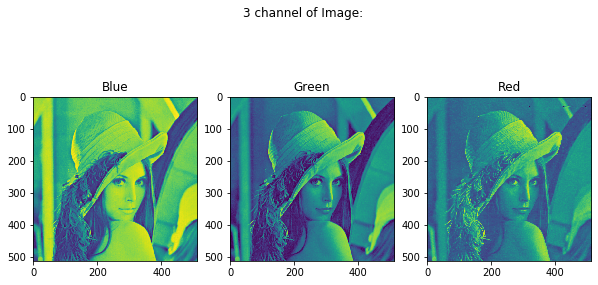

In [262]:
img_path = 'images/Lenna.png'


img_bgr = cv2.imread(img_path)
rgb_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

b,g,r = cv2.split(rgb_img) #split channels of image (better using numpy slicing eg. rgb_img[:,:,0])
b=rgb_img[:,:,0]
g=rgb_img[:,:,1]
r=rgb_img[:,:,2]


plt.figure(figsize=(10,5))
#plt.subplots(constrained_layout=True)
plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue")
plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green")
plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red")

plt.suptitle("3 channel of Image:")
plt.show()


#### Merge Image

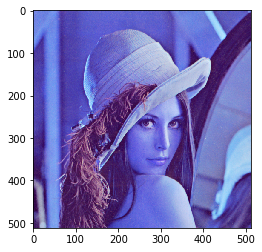

In [263]:
rgb = cv2.merge((r,g,b))
plt.imshow(rgb)
plt.show()

#### Padding

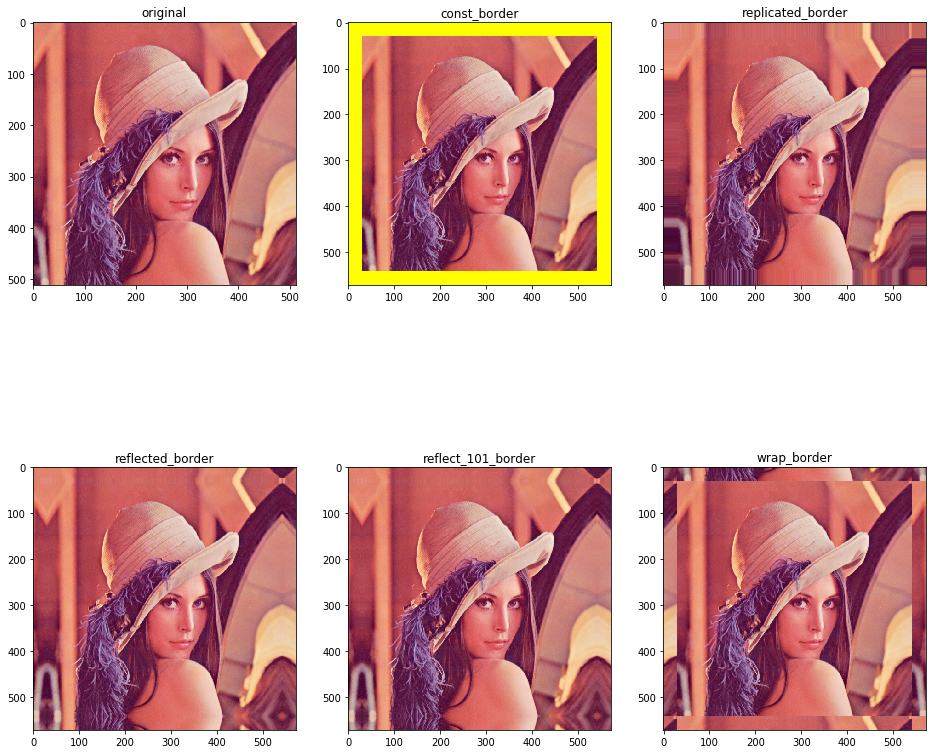

In [264]:
img_path = 'images/Lenna.png'
img_bgr = cv2.imread(img_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#make a copy of image with border
replicated_border = cv2.copyMakeBorder(img, 30, 30, 30, 30, cv2.BORDER_REPLICATE)
reflected_border = cv2.copyMakeBorder(img, 30, 30, 30, 30, cv2.BORDER_REFLECT)
reflect_101_border = cv2.copyMakeBorder(img, 30, 30, 30, 30, cv2.BORDER_REFLECT_101)
wrap_border = cv2.copyMakeBorder(img, 30, 30, 30, 30, cv2.BORDER_WRAP)
const_border = cv2.copyMakeBorder(img, 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=[255,255,0])

#use subplot to plot multiple images
plt.figure(figsize=(16,15))
plt.subplot(231), plt.imshow(img), plt.title('original')
plt.subplot(232), plt.imshow(const_border), plt.title('const_border')
plt.subplot(233), plt.imshow(replicated_border), plt.title('replicated_border')
plt.subplot(234), plt.imshow(reflected_border), plt.title('reflected_border')
plt.subplot(235), plt.imshow(reflect_101_border), plt.title('reflect_101_border')
plt.subplot(236), plt.imshow(wrap_border), plt.title('wrap_border')
plt.show() #show the plotting of all subplots

#### Morphological Operations

(512, 512)


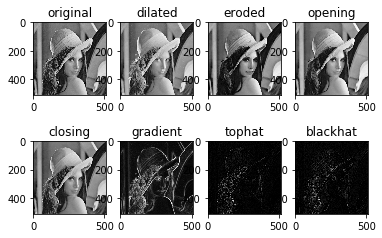

In [265]:
img_path = 'images/Lenna.png'
img_read = cv2.imread(img_path)
img = cv2.cvtColor(img_read, cv2.COLOR_BGR2GRAY)


print(img.shape)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5)) #get kernel/matrix of different shapes
dilated = cv2.dilate(img, kernel, iterations=1) #dilate (widen/enlarge) objects in image
eroded = cv2.erode(img, kernel, iterations=1) #erode (shrink) objects in image
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) #erosion followed by dilation
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) #Dilation followed by Erosion
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel) #difference between dilation and erosion of an image
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel) #difference between input image and Opening of the image
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel) #difference between the closing of the input image and input image

plt.subplot(241), plt.imshow(img, cmap='gray'), plt.title('original') #
plt.subplot(242), plt.imshow(dilated, cmap='gray'), plt.title('dilated')
plt.subplot(243), plt.imshow(eroded, cmap='gray'), plt.title('eroded')
plt.subplot(244), plt.imshow(opening, cmap='gray'), plt.title('opening')
plt.subplot(245), plt.imshow(closing, cmap='gray'), plt.title('closing')
plt.subplot(246), plt.imshow(gradient, cmap='gray'), plt.title('gradient')
plt.subplot(247), plt.imshow(tophat, cmap='gray'), plt.title('tophat')
plt.subplot(248), plt.imshow(blackhat, cmap='gray'), plt.title('blackhat')
plt.show()

#### Rotate Matrix

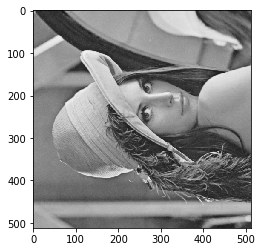

In [266]:
rw, cl, _ = img_read.shape
rot_mat = cv2.getRotationMatrix2D((rw/2,cl/2),90,1) #get rotation matrix to rotate an image in respect to a point
rotate = cv2.warpAffine(img,rot_mat,(rw,cl)) #rotate image using rotation matrix
plt.imshow(rotate, cmap='gray')

#### Perspective Transform

512
512
3


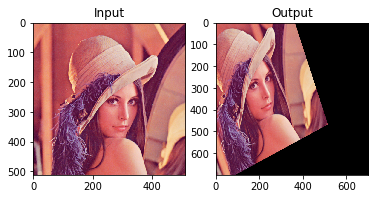

In [267]:
import numpy as np
img_path = 'images/Lenna.png'
img_bgr = cv2.imread(img_path)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
rw,cl, _ = img.shape
print(rw)
print(cl)
print(_)
pts_from = np.float32([[200,5],[810,260],[610,740],[5,480]])
pts_to = np.float32([[0,0],[700,0],[700,700],[0,700]])

M = cv2.getPerspectiveTransform(pts_from,pts_to) #get perspective transformation matrix (position four corners and their new locations are required)
dst = cv2.warpPerspective(img,M,(700,700)) #change perspective of image

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Drawing Shapes

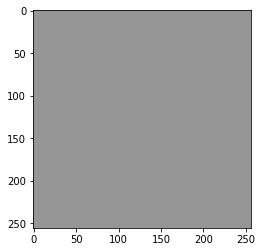

In [268]:
x = np.ones((256,256,3),np.uint8) #take numpy array of size (256,256,3) with values 0
plt.imshow(x*150) #show numpy array as image

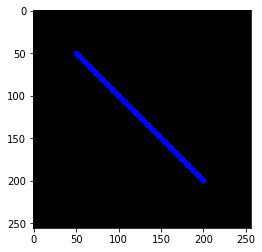

In [269]:
cv2.line(x,(50,50),(200,200),(0,0,255),5) #draw a line using opencv. image to draw on, start point, end point, color and thikness are parameters given
plt.imshow(x)

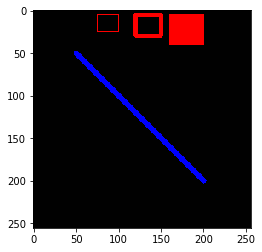

In [270]:
cv2.rectangle(x,(75,5),(100,25),(255,0,0)) #draw a rectangle using opencv. image to draw on, top left point of rectangle, bottom right point of rectangle and color are parameters
cv2.rectangle(x,(120,5),(150,30),(255,0,0),3) #draw rectangle with defined thikness
cv2.rectangle(x,(160,5),(200,40),(255,0,0),-1) #draw rectangle fill mode
plt.imshow(x)

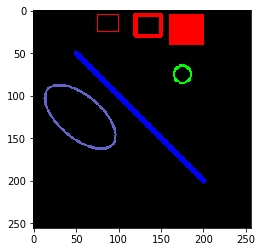

In [271]:
cv2.circle(x, (175,75),10,(0,255,0),2) #draw circle using opencv
cv2.ellipse(x, (55,125),(50, 25), 40, 0, 360, (100,100,200), 2) #draw ellipse
plt.imshow(x)

[[  5 175]
 [ 80 210]
 [ 95 250]
 [ 20 215]]
(4, 2)
[[[  5 175]]

 [[ 80 210]]

 [[ 95 250]]

 [[ 20 215]]]
(4, 1, 2)


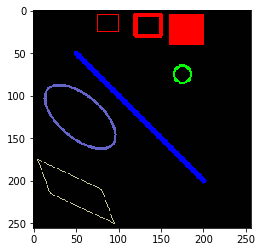

In [272]:
pts = np.array([[5,175],[80,210],[95,250],[20,215]],np.int32) #numpy array
print(pts)
print(pts.shape)
pts = pts.reshape((-1,1,2)) #reshape to match drawing methods paratmeter
print(pts)
print(pts.shape)
cv2.polylines(x,[pts],True,(200,200,150)) #draw polylines (send true to draw connected(polygon), false to draw lines only)
plt.imshow(x)



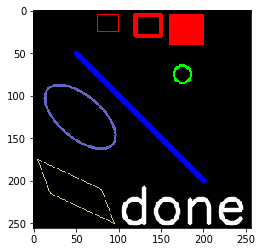

In [273]:
#draw text on image using opencv
font = cv2.FONT_HERSHEY_SIMPLEX #define font to draw text on image
cv2.putText(x,'done',(100,250),font, 2, (255,255,255), 3, cv2.LINE_AA) #draw text args: image, text_to_draw, bottom_left_position_of_text, font_face, font_size, color, line_thickness, line_drawing_method(cv2.LINE_AA for anti-aliasing(looks better at curves of text))
plt.imshow(x)

#### Thresholding

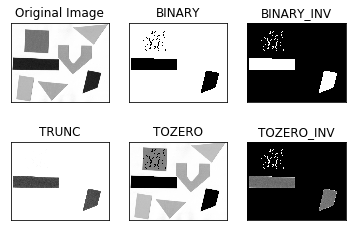

In [274]:
#image thresholding
img = cv2.imread('images/thresholding.png',0) #read image as grayscale
ret, img1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #binary thresholding
ret, img2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #binary thresholding with inversed result
ret, img3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret, img4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret, img5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, img1, img2, img3, img4, img5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray'), plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
#     cv2.imshow(titles[i],images[i])
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### Adaptive Thresholding

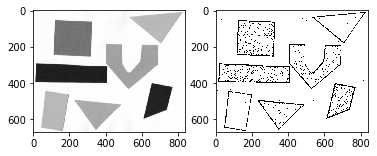

In [275]:
#adaptive thresholding
img = cv2.imread('images/thresholding.png',0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(121), plt.imshow(img,'gray')
#threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#threshold value is the mean of neighbourhood area
#img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.subplot(122), plt.imshow(img,'gray')
plt.show()

#### Blurring

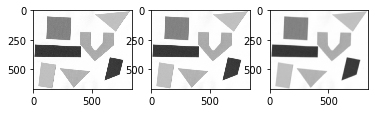

In [276]:
img = cv2.imread('images/thresholding.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(131),plt.imshow(img)
img2 = cv2.GaussianBlur(img,(5,5),0,0) #gaussian blur, args: image, kernel, sigmaX, sigmaY. if sigmaX, sigmaY is zero these are calculated from kernel
plt.subplot(132),plt.imshow(img2)
img3 = cv2.blur(img,(9,9))## Average Blurring
plt.subplot(133),plt.imshow(img3)
plt.show()

#### Contour Detection

127.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7f758b519550>,
 <matplotlib.image.AxesImage at 0x7f758b0f09d0>)

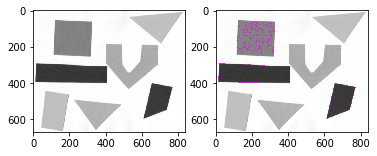

In [277]:
#find contours of image (findContours works only with binary image)
img = cv2.imread('images/thresholding.png')
imgray = img.copy()
imgray = cv2.cvtColor(imgray,cv2.COLOR_BGR2GRAY) #convert to gray
ret, thresh = cv2.threshold(imgray,127,255,0) #threshold image

contours,heirarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours on the thresholded image
img2 = cv2.drawContours(img.copy(),contours,-1,(255,0,255),1) #draw the contours found
# print(contours,heirarchy)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(img2)
# cv2.imshow('x',img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()